Шаг 1: Загрузка данных. Загрузите датасет, содержащий числовые
признаки (например, Boston Housing, California Housing или другой
подходящий из UCI или Kaggle). Импортируйте необходимые библиотеки для
работы с данными, визуализацией и анализом. Загрузите данные в DataFrame
и просмотрите первые строки, чтобы ознакомиться с набором данных.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

The cost of living indices provided on this website are relative to New York City (NYC), with a baseline index of 100% for NYC.

Here's a breakdown of each index and its meaning:


1.   Cost of Living Index (Excl. Rent): This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. It excludes accommodation expenses such as rent or mortgage. For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).
2.   Rent Index: This index estimates the prices of renting apartments in a city compared to New York City. If the Rent Index is 80, it suggests that the average rental prices in that city are approximately 20% lower than those in New York City.
3. Groceries Index: This index provides an estimation of grocery prices in a city relative to New York City. Numbeo uses item weights from the "Markets" section to calculate this index for each city.
4. Restaurants Index: This index compares the prices of meals and drinks in restaurants and bars to those in NYC.
5. Cost of Living Plus Rent Index: This index estimates consumer goods prices, including rent, in comparison to New York City.
6. Local Purchasing Power: This index indicates the relative purchasing power in a given city based on the average net salary. A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.




In [ ]:
data.head(4)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1


In [ ]:
data.dtypes

,0
Rank,int64
Country,object
Cost of Living Index,float64
Rent Index,float64
Cost of Living Plus Rent Index,float64
Groceries Index,float64
Restaurant Price Index,float64
Local Purchasing Power Index,float64


Шаг 2: Исследование корреляций. Постройте корреляционную матрицу
для числовых признаков. Визуализируйте корреляционную матрицу с
помощью тепловой карты (heatmap). Определите пары признаков с
наибольшей и наименьшей корреляцией. Для этого найдите максимальные и
минимальные значения в корреляционной матрице, исключив диагональные
элементы.

In [ ]:
corr_matrix_spearman = data.select_dtypes(include='number').corr(method = 'spearman').round(2)
corr_matrix_pearson = data.select_dtypes(include='number').corr(method = 'pearson').round(2)

In [ ]:
corr_matrix_pearson.style.background_gradient() #Показывает линейность взаимодействия

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,1.000000,-0.960000,-0.770000,-0.920000,-0.900000,-0.900000,-0.690000
Cost of Living Index,-0.960000,1.000000,0.820000,0.970000,0.960000,0.950000,0.690000
Rent Index,-0.770000,0.820000,1.000000,0.930000,0.770000,0.760000,0.680000
Cost of Living Plus Rent Index,-0.920000,0.970000,0.930000,1.000000,0.920000,0.910000,0.720000
Groceries Index,-0.900000,0.960000,0.770000,0.920000,1.000000,0.860000,0.640000
Restaurant Price Index,-0.900000,0.950000,0.760000,0.910000,0.860000,1.000000,0.670000
Local Purchasing Power Index,-0.690000,0.690000,0.680000,0.720000,0.640000,0.670000,1.000000


In [ ]:
corr_matrix_spearman.style.background_gradient() #Показывает монотонность взаимодействия

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,1.000000,-1.000000,-0.870000,-0.980000,-0.950000,-0.940000,-0.710000
Cost of Living Index,-1.000000,1.000000,0.870000,0.980000,0.950000,0.940000,0.710000
Rent Index,-0.870000,0.870000,1.000000,0.940000,0.820000,0.860000,0.680000
Cost of Living Plus Rent Index,-0.980000,0.980000,0.940000,1.000000,0.930000,0.940000,0.720000
Groceries Index,-0.950000,0.950000,0.820000,0.930000,1.000000,0.840000,0.640000
Restaurant Price Index,-0.940000,0.940000,0.860000,0.940000,0.840000,1.000000,0.680000
Local Purchasing Power Index,-0.710000,0.710000,0.680000,0.720000,0.640000,0.680000,1.000000


In [ ]:
corr_matrix_pearson_abs_with_inf_diag = abs(corr_matrix_pearson)
np.fill_diagonal(corr_matrix_pearson_abs_with_inf_diag.values, 1000)

In [ ]:
corr_matrix_pearson_abs_with_inf_diag.style.background_gradient()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,1000.000000,0.960000,0.770000,0.920000,0.900000,0.900000,0.690000
Cost of Living Index,0.960000,1000.000000,0.820000,0.970000,0.960000,0.950000,0.690000
Rent Index,0.770000,0.820000,1000.000000,0.930000,0.770000,0.760000,0.680000
Cost of Living Plus Rent Index,0.920000,0.970000,0.930000,1000.000000,0.920000,0.910000,0.720000
Groceries Index,0.900000,0.960000,0.770000,0.920000,1000.000000,0.860000,0.640000
Restaurant Price Index,0.900000,0.950000,0.760000,0.910000,0.860000,1000.000000,0.670000
Local Purchasing Power Index,0.690000,0.690000,0.680000,0.720000,0.640000,0.670000,1000.000000


In [ ]:
min_corr = np.min(corr_matrix_pearson_abs_with_inf_diag)
print(f'Пара признаков с миниммальной корреляцией: {corr_matrix_pearson_abs_with_inf_diag[corr_matrix_pearson_abs_with_inf_diag.values == min_corr].index}')
print(f'Значение минимальной корреляции: {min_corr}')

Пара признаков с миниммальной корреляцией: Index(['Groceries Index', 'Local Purchasing Power Index'], dtype='object')
Значение минимальной корреляции: 0.64


In [ ]:
corr_matrix_pearson_abs_with_minus_inf_diag = abs(corr_matrix_pearson)
np.fill_diagonal(corr_matrix_pearson_abs_with_minus_inf_diag.values, -1000)

In [ ]:
max_corr = np.max(corr_matrix_pearson_abs_with_minus_inf_diag)
print(f'Пара признаков с максимальной корреляцией: {corr_matrix_pearson_abs_with_inf_diag[corr_matrix_pearson_abs_with_minus_inf_diag.values == max_corr].index}')
print(f'Значение максимальной корреляции: {max_corr}')

Пара признаков с максимальной корреляцией: Index(['Cost of Living Index', 'Cost of Living Plus Rent Index'], dtype='object')
Значение максимальной корреляции: 0.97


Шаг 3: Построение графиков зависимостей. Выберите два признака с
сильной корреляцией. Замените на реальные названия признаков из вашего
датасета. Постройте диаграмму рассеяния (scatter plot) и добавьте линию
регрессии.



0.798226652188574 -4.409207457555565


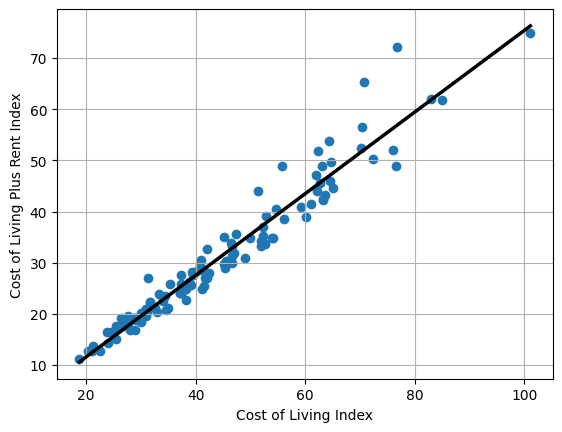

In [ ]:
x = data['Cost of Living Index']
y = data['Cost of Living Plus Rent Index']
plt.scatter(x, y)
a, b = np.polyfit(x, y, deg=1)
print(a, b)
plt.plot(x, b + a * x, color="k", lw=2.5)
plt.grid()
plt.xlabel('Cost of Living Index')
plt.ylabel('Cost of Living Plus Rent Index')
plt.show()

Шаг 4: Подготовка данных. Нормализуйте данные, чтобы привести все
признаки к одному масштабу, используя стандартное масштабирование.
Разделите данные на обучающую и тестовую выборки в пропорции 80/20.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x = data.select_dtypes(include="number").iloc[:, 1:]
y = data.select_dtypes(include="number").iloc[:, 0]
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)

Разбили на параметры и целевую переменную, отмасштабировали параметры

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2024-9-13)

In [ ]:
print(x_train.shape[0], x_test.shape[0], x_test.shape[0]/x_train.shape[0])

96 25 0.2604166666666667


Шаг 5: Визуализация трендов. Используйте модель линейной регрессии
для предсказания и постройте график распределения ошибок между
предсказанными и реальными значениями. Постройте график ошибок
(выбросов), чтобы оценить точность модели.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(x.columns)
print(lin_reg.coef_)
predict = lin_reg.predict(x_test)

Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')
[ 383.01711619  289.44334648 -697.71005779   17.68369601    9.19709542
   -1.15523043]


Натренировали линейную модель, посмотрели на коэффициенты, можно сделать вывод, что наиболее важными являются 'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index'

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error

In [ ]:
mape = mean_absolute_percentage_error(y_test, predict)
r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)

print(f"Средняя абсолютная процентная ошибка (MAPE): {mape*100}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Коэффициент детерминации (R^2): {r2}")

Средняя абсолютная процентная ошибка (MAPE): 32.93227064439447
Средняя абсолютная ошибка (MAE): 8.037323545309178
Коэффициент детерминации (R^2): 0.9344909017549624


Посмотрели метрики качества модели

In [ ]:
import seaborn as sns

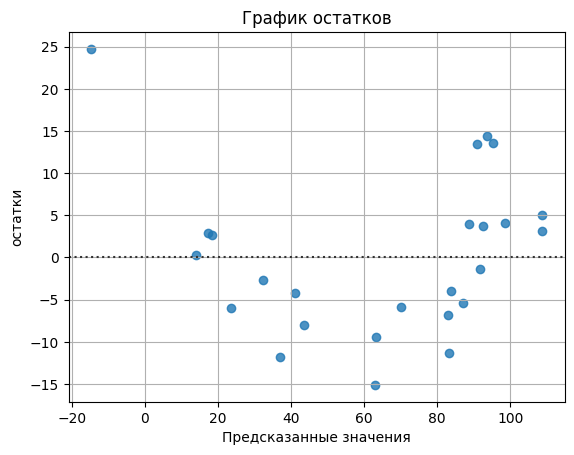

In [ ]:
sns.residplot(y = y_test-predict, x = predict, data = None)
plt.ylabel("остатки")
plt.xlabel("Предсказанные значения")
plt.title("График остатков")
plt.grid()
plt.show()

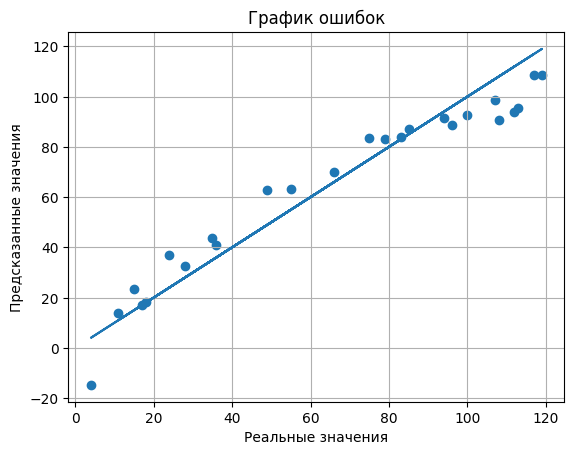

In [ ]:
plt.scatter(y_test, predict)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("График ошибок")
plt.plot(y_test, y_test)
plt.grid()
plt.show()

Нетрудно заметить, что коэффициент детерминации равен 0.93 и это вроде бы должно быть хорошо. Но метрика MAPE (средняя разница между прогнозируемым значением и фактическим значением) составляет 33%, что указывает на среднюю способность линейной модели к предсказанию значений.

Шаг 6: Ответьте на вопросы. Как изменение одного признака влияет на
другой? Как влияет масштабирование данных на качество модели?

1. Как изменение одного признака влияет на другой? Ответ: Всё зависит от корреляции между этими признаками. Если по модулю корреляция большая, то изменение одного признака будет существенно влиять на изменение другого и наоборот.
2. Как влияет масштабирование данных на качество модели? Ответ: Приведение признаков к одному масштабу важно для многих
алгоритмов, таких как линейная регрессия, метод k-ближайших соседей и
нейронные сети, поскольку они чувствительны к масштабам признаков.
Например, если один признак имеет диапазон значений от 0 до 1, а другой —
от 0 до 1000, алгоритм может неправильно оценивать значимость признаков.